In [678]:
import pandas as pd
import datetime 
import os
import numpy as np

# Backup

In [693]:
# linkedIn['yearstrip'] = linkedIn['Date (ISO Year Week)'].str.split(',').str[1].str.strip().str[:5]
# linkedIn['yearstrip'] = linkedIn['yearstrip'].apply(lambda x: x.strip(' '))
# linkedIn['iso_year'] = linkedIn['yearstrip'].apply(lambda x: int(x))
# linkedIn['weekstrip'] = linkedIn['Date (ISO Year Week)'].str.split('(').str[1].str.strip().str[5:7]
# linkedIn['weekstrip'] = linkedIn['weekstrip'].apply(lambda x: x.strip(')'))
# linkedIn['weekstrip'] = linkedIn['weekstrip'].apply(lambda x: x.strip(' '))
# linkedIn['iso_week'] = linkedIn['weekstrip'].apply(lambda x: int(x))
# linkedIn['weekstrip'] = linkedIn['weekstrip'].apply(lambda x: '0'+x if len(x)<2 else x)
# linkedIn['model_week_strip'] = linkedIn['yearstrip'] + linkedIn['weekstrip']
# linkedIn['model_week'] =linkedIn['model_week_strip'].apply(lambda x: int(x))
# linkedIn['iso_week'] = linkedIn['weekstrip'].apply(lambda x: int(x))
# linkedIn['model_week_strip'] = linkedIn['yearstrip'] + linkedIn['weekstrip']
# linkedIn['model_week'] =linkedIn['model_week_strip'].apply(lambda x: int(x))
# linkedIn = linkedIn[['model_week', 'Campaign group name', 'Total spent', 'iso_week', 'iso_year', 'model_week']].rename({'Total spent':'linkedIn_search_ad_spend', 'Campaign group name':'Country/Territory'}, axis=1)


# Code

In [932]:
# folder_path = "data/usaonlyanalysis"
# filenames = os.listdir(folder_path)
# print(filenames)
# for i in range(0, len(filenames)):
#     print(filenames[i])
#     print(i)

# Raw Imports

In [1052]:
podcasts_raw = pd.read_csv(folder_path + '/' + 'TPE Podcast Downloads_2022-01-01_to_2025-06-05.csv')
linkedIn_raw = pd.read_csv(folder_path + '/' + 'Impact_ Linkedin Ads Overview Report v2_NA - D_W_M_Table.csv')
paidgifting_raw = pd.read_csv(folder_path + '/' +  'paid_Gifting.csv')
fb_raw = pd.read_csv(folder_path + '/' + 'Impact_ Facebook Ads Overview Report_NA - D_W_M + Creatives_Table.csv')
events_raw = pd.read_csv(folder_path + '/' + 'EventsDataAgg - usonly.csv')
mqls_raw = pd.read_csv(folder_path + '/' + 'daily_mqls_pulled_20250617.csv')
# mqls_raw = pd.read_csv(folder_path + '/' + 'mql_exclude_admin.csv')
emails_raw = pd.read_csv(folder_path + '/' + 'MarketoData.csv' )
google_search_raw = pd.read_csv(folder_path + '/' + 'GoogleSearchConsulExport-USOnly-DailyImpressions.csv')
google_ads_raw = pd.read_csv(folder_path + '/' +  'DEPT Initial Report - US ONLY.csv')
direct_raw = pd.read_csv(folder_path + '/' + 'DirectBuy.csv')
google_events_ga4_2024 = pd.read_csv(folder_path+'/'+'2024 Google Analytics Data.csv')
google_events_ga4_2025 = pd.read_csv(folder_path+'/'+'2025 Google Analytics Data.csv')


# GA4 Web Events Data

In [1053]:
google_events_ga4_2025['Date'].min()
google_events_ga4_2025['Date'].max()

'Set-Cookie:crlf=injection'

In [1054]:
google_web_events_ga4 = pd.concat([google_events_ga4_2025, google_events_ga4_2024], ignore_index=True)
google_web_events_ga4 = google_web_events_ga4[google_web_events_ga4['Date']!='Set-Cookie:crlf=injection']

In [1055]:
google_web_events_ga4['date'] = google_web_events_ga4['Date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").date())
google_web_events_ga4['iso_week'] = google_web_events_ga4['date'].apply(lambda x: x.isocalendar().week)
google_web_events_ga4['iso_year'] = google_web_events_ga4['date'].apply(lambda x: x.isocalendar().year)
google_web_events_ga4['weekstr'] = google_web_events_ga4['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_web_events_ga4['yearstr'] = google_web_events_ga4['iso_year'].apply(lambda x: str(x))
google_web_events_ga4['model_week_str'] = google_web_events_ga4['yearstr'] + google_web_events_ga4['weekstr']
google_web_events_ga4['model_week'] =google_web_events_ga4['model_week_str'].apply(lambda x: int(x))
google_web_events_ga4 = google_web_events_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'Sessions', 'Page location']].rename({'Sessions':'ga4_sessions', 'Page location':'ga4_page_path'}, axis=1)


google_web_events_ga4['path_split'] = google_web_events_ga4['ga4_page_path'].str.split('/')
google_web_events_ga4['domain'] = google_web_events_ga4['path_split'].apply(lambda x: x[2])
google_web_events_ga4['domainsub1'] = google_web_events_ga4['path_split'].apply(lambda x: x[3] if len(x)>3 else '')

## Daily All Data

In [1056]:
google_daily_traffic = google_web_events_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

## Daily ImpactDotCom

In [1057]:
impactDotComPageInclusions =  pd.read_csv(folder_path+'/'+'ga4_domain_data_summary - mpact.com-domain-summary.csv')
impactDotComPageInclusions = impactDotComPageInclusions[impactDotComPageInclusions['Include']=='Yes']

In [1058]:
impactDotComPageInclusions.fillna('')
impactDotComPageInclusions

,Unnamed: 0,domainsub1,ga4_sessions,Include
0,0,NaN,3572169,Yes
1,1,partners,440737,Yes
2,2,affiliate-marketing,283069,Yes
3,3,request-a-demo-for-brands,165854,Yes
4,4,integrated-platform-prices,118149,Yes
...,...,...,...,...
70,70,find-influencers,279,Yes
72,72,onesheets,267,Yes
73,73,saasquatch,240,Yes
74,74,warc-research-report,230,Yes


In [1059]:
impactDotCom_daily_ga4 = google_web_events_ga4[(google_web_events_ga4['domain']=='impact.com') &(google_web_events_ga4['domainsub1'].isin(impactDotComPageInclusions['domainsub1'])) ]

In [1060]:
impactDotCom_daily_ga4

,model_week,date,iso_week,iso_year,ga4_sessions,ga4_page_path,path_split,domain,domainsub1
2061,202517,2025-04-22,17,2025,1807.0,https://impact.com/case-studies/olipop-case-st...,"[https:, , impact.com, case-studies, olipop-ca...",impact.com,case-studies
2685,202521,2025-05-22,21,2025,1402.0,https://impact.com/affiliate-marketing/,"[https:, , impact.com, affiliate-marketing, ]",impact.com,affiliate-marketing
3058,202516,2025-04-15,16,2025,1254.0,https://impact.com/affiliate-marketing/,"[https:, , impact.com, affiliate-marketing, ]",impact.com,affiliate-marketing
3085,202521,2025-05-20,21,2025,1254.0,https://impact.com/partners/affiliate-partners/,"[https:, , impact.com, partners, affiliate-par...",impact.com,partners
3198,202523,2025-06-05,23,2025,1217.0,https://impact.com/case-studies/olipop-case-st...,"[https:, , impact.com, case-studies, olipop-ca...",impact.com,case-studies
...,...,...,...,...,...,...,...,...,...
199723,202424,2024-06-12,24,2024,80.0,https://impact.com/partnerships/5-dos-and-dont...,"[https:, , impact.com, partnerships, 5-dos-and...",impact.com,partnerships
199724,202424,2024-06-12,24,2024,80.0,https://impact.com/press-releases/,"[https:, , impact.com, press-releases, ]",impact.com,press-releases
199725,202424,2024-06-12,24,2024,80.0,https://impact.com/press-releases/impact-com-r...,"[https:, , impact.com, press-releases, impact-...",impact.com,press-releases
199726,202424,2024-06-12,24,2024,80.0,https://impact.com/request-a-demo-for-publishers/,"[https:, , impact.com, request-a-demo-for-publ...",impact.com,request-a-demo-for-publishers


In [1061]:
impactDotCom_daily_traffic = impactDotCom_daily_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index().rename({'ga4_sessions':'impactDotCom_ga4_sessions'}, axis=1)

In [1062]:
impactDotCom_daily_traffic

,model_week,date,iso_week,iso_year,impactDotCom_ga4_sessions
0,202415,2024-04-11,15,2024,5091.0
1,202415,2024-04-12,15,2024,4936.0
2,202415,2024-04-13,15,2024,2708.0
3,202415,2024-04-14,15,2024,2665.0
4,202416,2024-04-15,16,2024,7681.0
...,...,...,...,...,...
421,202523,2025-06-06,23,2025,2731.0
422,202523,2025-06-07,23,2025,1181.0
423,202523,2025-06-08,23,2025,2992.0
424,202524,2025-06-09,24,2025,3174.0


## Path Analysis

In [1063]:
page_path_summary = google_web_events_ga4[['ga4_page_path', 'ga4_sessions']].groupby('ga4_page_path').sum().sort_values(by='ga4_sessions', ascending=False).reset_index()
page_path_summary[page_path_summary['ga4_sessions']>800000]

,ga4_page_path,ga4_sessions
0,https://app.impact.com/login.user,13102875.0
1,https://app.impact.com/secure/mediapartner/hom...,9258248.0
2,https://impact.com/,3572169.0
3,https://app.impact.com/secure/advertiser/engag...,2789849.0
4,https://app.impact.com/secure/device/auth.ihtml,2618199.0
5,https://app.impact.com/signup/none/create-new-...,2223282.0
6,https://app.impact.com/insertionorder/partner-...,1934316.0
7,https://demo.impact.com/login.user,1446796.0
8,https://app.impact.com/secure/mediapartner/mar...,1129091.0
9,https://app.impact.com/loginError.user,1114263.0


In [1064]:
page_path_summary['path_split'] = page_path_summary['ga4_page_path'].str.split('/')

In [1065]:
page_path_summary['path_split'] = page_path_summary['ga4_page_path'].str.split('/')
page_path_summary['domain'] = page_path_summary['path_split'].apply(lambda x: x[2])
page_path_summary['domainsub1'] = page_path_summary['path_split'].apply(lambda x: x[3] if len(x)>3 else '')
page_path_summary['domainsub2'] = page_path_summary['path_split'].apply(lambda x: x[4]if len(x)>4 else '')
page_path_summary['domainsub3'] = page_path_summary['path_split'].apply(lambda x: x[5]if len(x)>5 else '')
page_path_summary['domainsub4'] = page_path_summary['path_split'].apply(lambda x: x[6]if len(x)>6 else '')

In [1066]:
domain_summary = page_path_summary[['domain', 'ga4_sessions']].groupby('domain').sum().sort_values('ga4_sessions', ascending=False).reset_index()

In [1067]:
domain_summary.to_csv('ga4_domain_data_summary.csv')

In [1068]:
page_path_summary['domain']

0                   app.impact.com
1                   app.impact.com
2                       impact.com
3                   app.impact.com
4                   app.impact.com
                   ...            
22135               app.impact.com
22136               app.impact.com
22137               app.impact.com
22138    creators.audibletrial.com
22139    creators.audibletrial.com
Name: domain, Length: 22140, dtype: object

In [1069]:
impactDotComPages = page_path_summary[page_path_summary['domain']=='impact.com']

In [1070]:
impactDotComPages[['domainsub1', 'ga4_sessions']].groupby('domainsub1').sum().sort_values('ga4_sessions', ascending=False).reset_index()

,domainsub1,ga4_sessions
0,,3572169.0
1,partners,440737.0
2,affiliate-marketing,283069.0
3,request-a-demo-for-brands,165854.0
4,integrated-platform-prices,118149.0
...,...,...
130,?utm_source=linkedin&utm_medium=brand-organic-...,74.0
131,?_gl=xxxxxxxxxxxxxxxxxx&gclid=Cj0KCQiA-5a9BhCB...,74.0
132,impact-com-creator-influencer-marketing-platfo...,74.0
133,?utm_source=stripe.com&utm_medium=referral&utm...,74.0


In [1071]:
impactDotComPagesSummary = impactDotComPages[['domainsub1', 'ga4_sessions']].groupby('domainsub1').sum().sort_values('ga4_sessions', ascending=False).reset_index()

In [1072]:
impactDotComPagesSummary.to_csv('impactDotComPagesSummary.csv')

# Google Ads

In [1073]:
google_ads = google_ads_raw.copy()
google_ads = google_ads[google_ads['Account name']=='Impact Radius']
google_ads['date'] = google_ads['Day'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d").date())
google_ads['iso_week'] = google_ads['date'].apply(lambda x: x.isocalendar().week)
google_ads['iso_year'] = google_ads['date'].apply(lambda x: x.isocalendar().year)
google_ads['weekstr'] = google_ads['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_ads['yearstr'] = google_ads['iso_year'].apply(lambda x: str(x))
google_ads['model_week_str'] = google_ads['yearstr'] + google_ads['weekstr']
google_ads['model_week'] =google_ads['model_week_str'].apply(lambda x: int(x))
google_ads = google_ads[['model_week', 'date', 'iso_week', 'iso_year', 'Cost', 'Impr.']].rename({'Cost':'googleAds_spend', 'Impr.':'googleAds_impressions'}, axis=1)

# Podcast

In [1074]:
podcasts = podcasts_raw.copy()
podcasts['date'] = podcasts['Date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
podcasts['iso_week'] = podcasts['date'].apply(lambda x: x.isocalendar().week)
podcasts['iso_year'] = podcasts['date'].apply(lambda x: x.isocalendar().year)
podcasts['weekstr'] = podcasts['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
podcasts['yearstr'] = podcasts['iso_year'].apply(lambda x: str(x))
podcasts['model_week_str'] = podcasts['yearstr'] + podcasts['weekstr']
podcasts['model_week'] =podcasts['model_week_str'].apply(lambda x: int(x))
podcasts = podcasts[['model_week', 'date', 'iso_week', 'iso_year', 'Downloads']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Downloads':'podcast_streams'}, axis=1).reset_index()

In [1075]:
podcasts['date']

0       2022-06-03
1       2022-06-04
2       2022-06-05
3       2022-06-06
4       2022-06-07
           ...    
1094    2025-06-01
1095    2025-06-02
1096    2025-06-03
1097    2025-06-04
1098    2025-06-05
Name: date, Length: 1099, dtype: object

# LinkedIn

In [1076]:
linkedIn = linkedIn_raw.copy()


In [1077]:
linkedIn = linkedIn_raw.copy()
linkedIn['date'] = linkedIn['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y").date())
linkedIn['iso_week'] = linkedIn['date'].apply(lambda x: x.isocalendar().week)
linkedIn['iso_year'] = linkedIn['date'].apply(lambda x: x.isocalendar().year)
linkedIn['weekstr'] = linkedIn['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
linkedIn['yearstr'] = linkedIn['iso_year'].apply(lambda x: str(x))
linkedIn['model_week_str'] = linkedIn['yearstr'] + linkedIn['weekstr']
linkedIn['model_week'] =linkedIn['model_week_str'].apply(lambda x: int(x))
linkedIn = linkedIn[['model_week', 'date', 'iso_week', 'iso_year', 'Total spent', 'Impressions','Clicks' ]].rename({'Total spent':'linkedin_spend','Impressions':'linkedin_impressions', 'Clicks':'linkedin_clicks' }, axis=1)

# FB

In [1078]:
fb_raw

,Date,Amount spent,Impressions,Link clicks,CTR (link click-through rate),CPM,CPC (link),On-Facebook leads,Cost per on-Facebook lead,Website conversions,Frequency
0,"Jun 11, 2025",712.51,38520,171,0.004439,18.497144,4.166725,11,64.773636,53,NaN
1,"Jun 10, 2025",2294.01,143786,680,0.004729,15.954335,3.373544,58,39.551897,237,NaN
2,"Jun 9, 2025",2274.63,143534,719,0.005009,15.847325,3.163602,49,46.421020,272,NaN
3,"Jun 8, 2025",2374.80,147653,759,0.005140,16.083656,3.128854,52,45.669231,243,NaN
4,"Jun 7, 2025",2265.68,142247,766,0.005385,15.927788,2.957807,51,44.425098,258,NaN
...,...,...,...,...,...,...,...,...,...,...,...
855,"Jan 7, 2023",1041.89,54117,295,0.005451,19.252545,3.531831,20,52.094500,31,NaN
856,"Jan 6, 2023",1052.34,58945,307,0.005208,17.852914,3.427818,14,75.167143,37,NaN
857,"Jan 5, 2023",1047.54,55214,303,0.005488,18.972362,3.457228,12,87.295000,43,NaN
858,"Jan 4, 2023",1048.24,49117,283,0.005762,21.341694,3.704028,20,52.412000,32,NaN


In [1079]:
fb = fb_raw.copy()
fb['date'] = fb['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y").date())
fb['iso_week'] = fb['date'].apply(lambda x: x.isocalendar().week)
fb['iso_year'] = fb['date'].apply(lambda x: x.isocalendar().year)
fb['weekstr'] = fb['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
fb['yearstr'] = fb['iso_year'].apply(lambda x: str(x))
fb['model_week_str'] = fb['yearstr'] + fb['weekstr']
fb['model_week'] =fb['model_week_str'].apply(lambda x: int(x))
fb = fb[['model_week', 'date', 'iso_week', 'iso_year', 'Amount spent', 'Impressions','Link clicks' ]].rename({'Amount spent':'fb_spend','Impressions':'fb_impressions', 'Link clicks':'fb_clicks' }, axis=1)


In [1080]:
fb

,model_week,date,iso_week,iso_year,fb_spend,fb_impressions,fb_clicks
0,202524,2025-06-11,24,2025,712.51,38520,171
1,202524,2025-06-10,24,2025,2294.01,143786,680
2,202524,2025-06-09,24,2025,2274.63,143534,719
3,202523,2025-06-08,23,2025,2374.80,147653,759
4,202523,2025-06-07,23,2025,2265.68,142247,766
...,...,...,...,...,...,...,...
855,202301,2023-01-07,1,2023,1041.89,54117,295
856,202301,2023-01-06,1,2023,1052.34,58945,307
857,202301,2023-01-05,1,2023,1047.54,55214,303
858,202301,2023-01-04,1,2023,1048.24,49117,283


# Google Search

In [1081]:
google_search = google_search_raw.copy() 

In [1082]:
google_search

,Date,Clicks,Impressions,CTR,Position
0,2025-06-04,1302,95609,1.36%,23.85
1,2025-06-03,1439,89275,1.61%,23.24
2,2025-06-02,1332,96166,1.39%,25.65
3,2025-06-01,469,70008,0.67%,29.57
4,2025-05-31,437,68313,0.64%,30.08
...,...,...,...,...,...
481,2024-02-09,1177,30566,3.85%,22.44
482,2024-02-08,1272,33018,3.85%,19.90
483,2024-02-07,1444,34593,4.17%,20.09
484,2024-02-06,1559,37451,4.16%,20.79


In [1083]:
google_search['date'] = google_search['Date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d").date())
google_search['iso_week'] = google_search['date'].apply(lambda x: x.isocalendar().week)
google_search['iso_year'] = google_search['date'].apply(lambda x: x.isocalendar().year)
google_search['weekstr'] = google_search['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_search['yearstr'] = google_search['iso_year'].apply(lambda x: str(x))
google_search['model_week_str'] = google_search['yearstr'] + google_search['weekstr']
google_search['model_week'] =google_search['model_week_str'].apply(lambda x: int(x))
google_search = google_search[['model_week', 'date', 'iso_week', 'iso_year', 'Clicks', 'Impressions']].rename({'Clicks':'gSearch_sessions', 'Impressions':'gSearch_impressions'}, axis=1)

In [1084]:
google_search

,model_week,date,iso_week,iso_year,gSearch_sessions,gSearch_impressions
0,202523,2025-06-04,23,2025,1302,95609
1,202523,2025-06-03,23,2025,1439,89275
2,202523,2025-06-02,23,2025,1332,96166
3,202522,2025-06-01,22,2025,469,70008
4,202522,2025-05-31,22,2025,437,68313
...,...,...,...,...,...,...
481,202406,2024-02-09,6,2024,1177,30566
482,202406,2024-02-08,6,2024,1272,33018
483,202406,2024-02-07,6,2024,1444,34593
484,202406,2024-02-06,6,2024,1559,37451


# Paid Gifting

In [1085]:
paidgifting = paidgifting_raw.dropna().copy()
paidgifting['date']= paidgifting['gift_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
paidgifting['iso_week'] = paidgifting['date'].apply(lambda x: x.isocalendar().week)
paidgifting['iso_year'] = paidgifting['date'].apply(lambda x: x.isocalendar().year)
paidgifting['weekstr'] = paidgifting['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
paidgifting['yearstr'] = paidgifting['iso_year'].apply(lambda x: str(x))
paidgifting['model_week_str'] = paidgifting['yearstr'] + paidgifting['weekstr']
paidgifting['model_week'] =paidgifting['model_week_str'].apply(lambda x: int(x))
paidgifting = paidgifting[['model_week', 'date', 'iso_week', 'iso_year', 'gift_cost']].rename({'gift_cost':'gift_spend'}, axis=1)
paidgifting_daily = paidgifting[['model_week', 'date', 'iso_week', 'iso_year', 'gift_spend']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

# MQLs

In [1086]:
mqls_raw['date'].dtype

dtype('O')

In [1087]:
mqls = mqls_raw.copy()
mqls['date']= mqls['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
mqls['iso_week'] = mqls['date'].apply(lambda x: x.isocalendar().week)
mqls['iso_year'] = mqls['date'].apply(lambda x: x.isocalendar().year)
mqls['weekstr'] = mqls['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
mqls['yearstr'] = mqls['iso_year'].apply(lambda x: str(x))
mqls['model_week_str'] = mqls['yearstr'] + mqls['weekstr']
mqls['model_week'] = mqls['model_week_str'].apply(lambda x: int(x))
mqls['mql_count'] = mqls['mql_count'].fillna(0)
mqls= mqls[['model_week', 'iso_week', 'iso_year', 'date', 'mql_count']]


In [1088]:
mqls[['mql_count']]

,mql_count
0,5
1,9
2,2
3,1
4,1
...,...
3060,4
3061,2
3062,1
3063,2


In [1089]:
mqls['mql_count'].mean()

np.float64(30.468189233278956)

# Emails

In [1090]:
emails = emails_raw.copy()
emails['date'] = emails['First Activity (PDT)'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y %I:%M %p").date())
emails['iso_week'] = emails['date'].apply(lambda x: x.isocalendar().week)
emails['iso_year'] = emails['date'].apply(lambda x: x.isocalendar().year)
emails['weekstr'] = emails['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
emails['yearstr'] = emails['iso_year'].apply(lambda x: str(x))
emails['model_week_str'] = emails['yearstr'] + emails['weekstr']
emails['model_week'] =emails['model_week_str'].apply(lambda x: int(x))
emails = emails[['model_week', 'date', 'iso_week', 'iso_year', 'Sent', 'Delivered','Opened' ]].rename({'Sent':'email_sent_cnt','Delivered':'email_delivered_cnt', 'Opened':'email_opened_cnt' }, axis=1)
for var in ['email_sent_cnt', 'email_delivered_cnt','email_opened_cnt']:
    print(var)
    emails[var]=emails[var].apply(lambda x: int(x.replace(",", "")))
emails_daily = emails[['model_week', 'date', 'iso_week', 'iso_year', 'email_opened_cnt']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

email_sent_cnt
email_delivered_cnt
email_opened_cnt


In [1091]:
emails_daily

,model_week,date,iso_week,iso_year,email_opened_cnt
0,202323,2023-06-06,23,2023,3315
1,202323,2023-06-07,23,2023,304697
2,202323,2023-06-08,23,2023,13676
3,202324,2023-06-12,24,2023,369
4,202324,2023-06-13,24,2023,8631
...,...,...,...,...,...
292,202521,2025-05-20,21,2025,302
293,202522,2025-05-27,22,2025,376
294,202523,2025-06-02,23,2025,997
295,202523,2025-06-05,23,2025,425


# Direct

In [1092]:
direct_raw

,Status,QTR,Vertical,Month,TYPE,Launch date,Vendor,Publication (see Audience breakdown tab for details),Channel,Cost,Cost_MMM,Date_ MMM
0,Complete,Q1,Marketing,March,Lead gen campaign,3/3/2025,Morning Brew,Marketing Brew,Newsletter,NaN,$1.00,3/3/2025
1,Complete,Q1,Marketing,March,Lead gen campaign,2/15/2025,PharosIQ,PharosIS,Lead gen,"$200,000.00","$200,000.00",2/15/2025
2,Complete,Q1,Finserv,March,Lead gen campaign,3/10/2025,Industry dive,Banking Dive,Newsletter,"$7,000.00","$7,000.00",3/10/2025
3,Complete,Q1,Retail,March,Lead gen campaign,3/18/2025,Industry dive,Retail Dive,Eblast,"$8,000.00","$8,000.00",3/18/2025
4,Complete,Q1,Marketing,March,Lead gen campaign,3/18/2025,Workweek,Marketing Millenials,Newsletter ad,"$11,711.00","$11,711.00",3/18/2025
...,...,...,...,...,...,...,...,...,...,...,...,...
175,NaN,Q1,General,March,NaN,"3/8 , 3/12",Growth Hackers Daily,Growth Hackers Daily,"8 ads $6,000 (1 takeover, 2 primaries, and 5 s...","$6,000.00","$3,000.00",03/12/2023
176,NaN,Q1,General,March,NaN,3/9/2023,Industry Dive,Marketing Dive Email Blast,Eblast,"$12,000.00","$12,000.00",3/9/2023
177,NaN,Q1,Creator,March,NaN,3/9/2023,Industry Dive,Social media dive,Newsletter,"$12,500.00","$12,500.00",3/9/2023
178,NaN,Q1,Retail,March,NaN,3/9/2023,Industry Dive,Retail Dive Email Blast,Eblast,"$10,500.00","$10,500.00",3/9/2023


In [1093]:
direct= direct_raw.copy()
direct['date']= direct['Date_ MMM'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").date())


direct['iso_week'] = direct['date'].apply(lambda x: x.isocalendar().week)
direct['iso_year'] = direct['date'].apply(lambda x: x.isocalendar().year)
direct['weekstr'] = direct['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
direct['yearstr'] = direct['iso_year'].apply(lambda x: str(x))
direct['model_week_str'] = direct['yearstr'] + direct['weekstr']
direct['model_week'] =direct['model_week_str'].apply(lambda x: int(x))
direct['Cost_MMM'] = direct['Cost_MMM'].apply(lambda x: float(x.replace(',','').replace('$','')) if type(x)!=float else x)
direct = direct[['model_week', 'date', 'iso_week', 'iso_year', 'Cost_MMM' ]].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Cost_MMM':'direct_spend'}, axis=1)


# Events

In [1094]:
events = events_raw[events_raw['Region']=='NAM']
events = events[events['Event Actual Cost - Pls input in SF campaign'].isnull()==False]
events['date']= events['Event Start Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").date())
events['iso_week'] = events['date'].apply(lambda x: x.isocalendar().week)
events['iso_year'] = events['date'].apply(lambda x: x.isocalendar().year)
events['weekstr'] = events['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
events['yearstr'] = events['iso_year'].apply(lambda x: str(x))
events['model_week_str'] = events['yearstr'] + events['weekstr']
events['model_week'] =events['model_week_str'].apply(lambda x: int(x))
events = events[['model_week', 'date', 'iso_week', 'iso_year', 'Event Actual Cost - Pls input in SF campaign']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Event Actual Cost - Pls input in SF campaign':'event_spend'}, axis=1).reset_index()


In [1095]:
events

,model_week,date,iso_week,iso_year,event_spend
0,202304,2023-01-23,4,2023,18298.0
1,202309,2023-02-28,9,2023,69279.0
2,202313,2023-03-27,13,2023,66790.0
3,202313,2023-04-02,13,2023,40918.0
4,202314,2023-04-04,14,2023,29270.0
5,202318,2023-05-04,18,2023,45043.0
6,202324,2023-06-13,24,2023,916994.0
7,202325,2023-06-20,25,2023,16500.0
8,202331,2023-07-31,31,2023,26351.0
9,202337,2023-09-11,37,2023,65465.0


# Combined DF

In [1413]:
combined = pd.merge(google_daily_traffic, podcasts, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, linkedIn, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, google_search, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, paidgifting_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, emails_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, direct, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, fb, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, google_ads, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, events, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, impactDotCom_daily_traffic, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape

combined['month'] = combined['date'].apply(lambda x: x.month)


In [1414]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month
187,202442,2024-10-15,42,2024,238767.0,95.0,12605.50999,178616,1038,1284.0,...,34666.0,1727.34,51080.0,249.0,6233.39,"12,400",NaN,340,3896.0,10


In [1415]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_week                 426 non-null    int64  
 1   date                       426 non-null    object 
 2   iso_week                   426 non-null    int64  
 3   iso_year                   426 non-null    int64  
 4   ga4_sessions               426 non-null    float64
 5   podcast_streams            421 non-null    float64
 6   linkedin_spend             426 non-null    float64
 7   linkedin_impressions       426 non-null    int64  
 8   linkedin_clicks            426 non-null    int64  
 9   gSearch_sessions           420 non-null    float64
 10  gSearch_impressions        420 non-null    float64
 11  gift_spend                 263 non-null    float64
 12  email_opened_cnt           155 non-null    float64
 13  direct_spend               58 non-null     float64

In [1416]:
convert_fields = ['googleAds_impressions']
for var in convert_fields:
    combined[var] = combined[var].fillna('0')
    combined[var] = combined[var].apply(lambda x: float(x.replace(',','').replace('$','')))
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_week                 426 non-null    int64  
 1   date                       426 non-null    object 
 2   iso_week                   426 non-null    int64  
 3   iso_year                   426 non-null    int64  
 4   ga4_sessions               426 non-null    float64
 5   podcast_streams            421 non-null    float64
 6   linkedin_spend             426 non-null    float64
 7   linkedin_impressions       426 non-null    int64  
 8   linkedin_clicks            426 non-null    int64  
 9   gSearch_sessions           420 non-null    float64
 10  gSearch_impressions        420 non-null    float64
 11  gift_spend                 263 non-null    float64
 12  email_opened_cnt           155 non-null    float64
 13  direct_spend               58 non-null     float64

In [1417]:
gaSpend_missing = combined[combined['googleAds_spend'].isnull()==True]
gaSpend_missing[['date']]

,date
51,2024-06-01
52,2024-06-02
385,2025-05-01
386,2025-05-02
387,2025-05-03
388,2025-05-04


In [1418]:
fb_missing = combined[combined['fb_spend'].isnull()==True]
fb_missing[['date']]

,date
191,2024-10-19
192,2024-10-20
193,2024-10-21
194,2024-10-22
195,2024-10-23
196,2024-10-24
197,2024-10-25
198,2024-10-26
199,2024-10-27
200,2024-10-28


In [1419]:
# spendVars = ['gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend', 'event_spend']
# for var in spendVars:
#     if combined[var].dtype != float:
#         print(combined[var].dtype)
#         combined[var] = combined[var].apply(lambda x: x.replace(',','').replace('$',''))

In [1420]:
combined[combined['event_spend']>0]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month
5,202416,2024-04-16,16,2024,224572.0,151.0,10460.650000,168669,1158,1210.0,...,NaN,2164.09,105145.0,504.0,5447.02,8470.0,25720.0,52,5054.0,4
27,202419,2024-05-08,19,2024,242263.0,499.0,14448.280000,183731,1141,1300.0,...,NaN,2956.35,201448.0,810.0,7407.86,10015.0,17744.0,85,6568.0,5
54,202423,2024-06-04,23,2024,262643.0,4618.0,14440.410000,203812,1407,1266.0,...,9000.0,3033.01,180083.0,1064.0,6883.98,9810.0,6250.0,59,4178.0,6
109,202431,2024-07-29,31,2024,217530.0,53.0,13139.029991,244591,1284,1264.0,...,NaN,2449.76,114597.0,750.0,6749.88,15720.0,17744.0,120,4689.0,7
181,202441,2024-10-09,41,2024,224124.0,204.0,13807.429987,183029,1059,1176.0,...,NaN,1656.77,46939.0,279.0,6492.83,8252.0,36289.0,74,5723.0,10
200,202444,2024-10-28,44,2024,224246.0,100.0,6746.980000,109784,774,1217.0,...,NaN,NaN,NaN,NaN,3465.12,4726.0,21057.0,36,4450.0,10
222,202447,2024-11-19,47,2024,256537.0,422.0,8687.320000,123628,1061,1373.0,...,NaN,1794.93,50904.0,290.0,6265.78,8452.0,7000.0,43,4851.0,11
298,202506,2025-02-03,6,2025,254928.0,36.0,14518.360000,186969,1273,1236.0,...,NaN,1822.89,90495.0,369.0,4397.18,7095.0,32676.0,70,4579.0,2
299,202506,2025-02-04,6,2025,259275.0,37.0,14522.430000,192742,1390,1350.0,...,17381.0,1767.05,77220.0,347.0,5794.73,7354.0,103919.0,79,4764.0,2
349,202513,2025-03-26,13,2025,295692.0,2739.0,8739.670000,126300,1314,1310.0,...,NaN,2142.56,93726.0,438.0,6244.26,9381.0,6421.0,55,4727.0,3


In [1421]:
naFillVars = ['fb_spend', 'gift_spend', 'fb_impressions', 'fb_clicks','googleAds_spend', 'email_opened_cnt', 'gift_spend', 'direct_spend','event_spend']
for var in naFillVars:
    combined[var] = combined[var].fillna(0)

In [1422]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month
187,202442,2024-10-15,42,2024,238767.0,95.0,12605.50999,178616,1038,1284.0,...,34666.0,1727.34,51080.0,249.0,6233.39,12400.0,0.0,340,3896.0,10


In [1423]:
combined[['linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend','event_spend']]

,linkedin_spend,gift_spend,direct_spend,fb_spend,googleAds_spend,event_spend
0,11063.50,0.00,9000.0,2169.57,6448.16,0.0
1,10985.40,498.86,0.0,2189.92,4544.18,0.0
2,8826.29,0.00,0.0,2140.88,1676.13,0.0
3,7257.84,0.00,0.0,2404.75,2054.01,0.0
4,10275.43,339.42,0.0,2307.37,5510.42,0.0
...,...,...,...,...,...,...
421,11533.45,0.00,0.0,2143.19,4599.39,0.0
422,10198.90,0.00,0.0,2265.68,3656.27,0.0
423,4765.20,0.00,0.0,2374.80,3816.07,0.0
424,11931.42,0.00,0.0,2274.63,5089.73,0.0


In [1424]:
combined.loc[:, spendVars].sum()

linkedin_spend     4.688612e+06
gift_spend         1.035616e+05
direct_spend       1.304820e+06
fb_spend           8.376888e+05
googleAds_spend    1.923729e+06
dtype: float64

In [1425]:
spendingSummary = combined[['iso_year','linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend']].groupby('iso_year').sum().reset_index()
spendVars = ['linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend']
for var in spendVars:
    print(var)
    spendingSummary[var] = spendingSummary[var].apply(lambda x: '{:,.2f}'.format(x))

linkedin_spend
gift_spend
direct_spend
fb_spend
googleAds_spend


In [1426]:
spendingSummary

,iso_year,linkedin_spend,gift_spend,direct_spend,fb_spend,googleAds_spend
0,2024,"2,858,585.91","61,495.78","798,634.00","559,556.91","1,295,373.29"
1,2025,"1,830,025.65","42,065.79","506,186.00","278,131.88","628,355.34"


In [1427]:
combined['date'].min()

datetime.date(2024, 4, 11)

In [1428]:
combined['date'].max()

datetime.date(2025, 6, 10)

In [1429]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_week                 426 non-null    int64  
 1   date                       426 non-null    object 
 2   iso_week                   426 non-null    int64  
 3   iso_year                   426 non-null    int64  
 4   ga4_sessions               426 non-null    float64
 5   podcast_streams            421 non-null    float64
 6   linkedin_spend             426 non-null    float64
 7   linkedin_impressions       426 non-null    int64  
 8   linkedin_clicks            426 non-null    int64  
 9   gSearch_sessions           420 non-null    float64
 10  gSearch_impressions        420 non-null    float64
 11  gift_spend                 426 non-null    float64
 12  email_opened_cnt           426 non-null    float64
 13  direct_spend               426 non-null    float64

In [1430]:
combined[combined['googleAds_impressions'].isnull()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month


In [1431]:
combined[combined['mql_count'].isnull()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month


In [1432]:
combined[combined['date']==pd.Timestamp('2024-10-14').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month
186,202442,2024-10-14,42,2024,218483.0,129.0,11470.159996,188529,995,1142.0,...,0.0,1783.9,53071.0,299.0,6570.45,12167.0,0.0,56,3458.0,10


### Historical Data EDA

In [1117]:
# combined = pd.merge(google_daily_traffic, podcasts, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, linkedIn, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, google_search, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, paidgifting_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, emails_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, direct, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, fb, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, google_ads, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape


In [1118]:
minCase = google_ads['date'].min()
maxCase = google_ads['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2011-10-13 and the max date is 2025-06-10


In [1119]:
google_ads[:5]

,model_week,date,iso_week,iso_year,googleAds_spend,googleAds_impressions
0,201141,2011-10-13,41,2011,0.00,0
1,201142,2011-10-18,42,2011,580.00,"276,820"
2,201142,2011-10-19,42,2011,537.27,"324,325"
3,201142,2011-10-20,42,2011,645.76,"330,915"
4,201142,2011-10-21,42,2011,95.77,"3,520"


In [1120]:
minCase = fb['date'].min()
maxCase = fb['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2023-01-03 and the max date is 2025-06-11


In [1121]:
minCase = linkedIn['date'].min()
maxCase = linkedIn['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2022-01-01 and the max date is 2025-06-11


# MOnthly Data - Query Volume, Seasonality

### Query Volumne

In [1451]:
queries_raw =  pd.read_csv("data/preliminaryCSVs/UnbrandedQueryVolume - Weekly- Gene.csv")
inflation_raw =  pd.read_csv("data/usaonlyanalysis/inflation_trends.csv")
durable_goods_raw =  pd.read_csv("data/usaonlyanalysis/durable_good_index.csv")
# consumer_senti_raw =  pd.read_csv("data/usaonlyanalysis/ConsumerSentiment.csv")

In [1452]:
durable_goods_raw

,Date,US_durable_goods
0,"April 30, 2025",-0.0630
1,"March 31, 2025",0.0936
2,"February 28, 2025",0.0089
3,"January 31, 2025",0.0334
4,"December 31, 2024",-0.0178
5,"November 30, 2024",-0.0200
6,"October 31, 2024",0.0079
7,"September 30, 2024",-0.0040
8,"August 31, 2024",-0.0089
9,"July 31, 2024",0.0987


In [1453]:
inflation = inflation_raw.copy()
inflation['date']=inflation['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%B %d, %Y").date())
inflation['month'] = inflation['date'].apply(lambda x: x.month)
inflation['iso_year'] = inflation['date'].apply(lambda x: x.year)
inflation = inflation[['date', 'month', 'iso_year', 'Inflation']].rename({'Inflation':'inflation_rate'}, axis=1)

In [1454]:
inflation

,date,month,iso_year,inflation_rate
0,2025-05-31,5,2025,0.0235
1,2025-04-30,4,2025,0.0231
2,2025-03-31,3,2025,0.0239
3,2025-02-28,2,2025,0.0282
4,2025-01-31,1,2025,0.0300
5,2024-12-31,12,2024,0.0289
6,2024-11-30,11,2024,0.0275
7,2024-10-31,10,2024,0.0260
8,2024-09-30,9,2024,0.0244
9,2024-08-31,8,2024,0.0253


In [1455]:
durable_goods = durable_goods_raw.copy()
durable_goods['date']=durable_goods['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%B %d, %Y").date())
durable_goods['month'] = durable_goods['date'].apply(lambda x: x.month)
durable_goods['iso_year'] = durable_goods['date'].apply(lambda x: x.year)
durable_goods = durable_goods[['date', 'month', 'iso_year', 'US_durable_goods']].rename({'US_durable_goods':'durable_goods_rates'}, axis=1)

In [1456]:
queryMonthlyDF = queries_raw[['Searches: May 2021', 'Searches: Jun 2021', 'Searches: Jul 2021',
       'Searches: Aug 2021', 'Searches: Sep 2021', 'Searches: Oct 2021',
       'Searches: Nov 2021', 'Searches: Dec 2021', 'Searches: Jan 2022',
       'Searches: Feb 2022', 'Searches: Mar 2022', 'Searches: Apr 2022',
       'Searches: May 2022', 'Searches: Jun 2022', 'Searches: Jul 2022',
       'Searches: Aug 2022', 'Searches: Sep 2022', 'Searches: Oct 2022',
       'Searches: Nov 2022', 'Searches: Dec 2022', 'Searches: Jan 2023',
       'Searches: Feb 2023', 'Searches: Mar 2023', 'Searches: Apr 2023',
       'Searches: May 2023', 'Searches: Jun 2023', 'Searches: Jul 2023',
       'Searches: Aug 2023', 'Searches: Sep 2023', 'Searches: Oct 2023',
       'Searches: Nov 2023', 'Searches: Dec 2023', 'Searches: Jan 2024',
       'Searches: Feb 2024', 'Searches: Mar 2024', 'Searches: Apr 2024',
       'Searches: May 2024', 'Searches: Jun 2024', 'Searches: Jul 2024',
       'Searches: Aug 2024', 'Searches: Sep 2024', 'Searches: Oct 2024',
       'Searches: Nov 2024', 'Searches: Dec 2024', 'Searches: Jan 2025',
       'Searches: Feb 2025', 'Searches: Mar 2025', 'Searches: Apr 2025']].sum().reset_index().rename({'index':'month_text', 0:'query_volume'}, axis=1)

In [1457]:
queryMonthlyDF.columns


Index(['month_text', 'query_volume'], dtype='object')

In [1458]:
import calendar


#datetime_object = datetime.datetime.strptime(month_abbr, "%b")

def days_in_month(year, month):
  """Returns the number of days in a given month of a given year."""
  return calendar.monthrange(year, month)[1]

In [1459]:
date_columns = ['Searches: May 2021', 'Searches: Jun 2021', 'Searches: Jul 2021',
       'Searches: Aug 2021', 'Searches: Sep 2021', 'Searches: Oct 2021',
       'Searches: Nov 2021', 'Searches: Dec 2021', 'Searches: Jan 2022',
       'Searches: Feb 2022', 'Searches: Mar 2022', 'Searches: Apr 2022',
       'Searches: May 2022', 'Searches: Jun 2022', 'Searches: Jul 2022',
       'Searches: Aug 2022', 'Searches: Sep 2022', 'Searches: Oct 2022',
       'Searches: Nov 2022', 'Searches: Dec 2022', 'Searches: Jan 2023',
       'Searches: Feb 2023', 'Searches: Mar 2023', 'Searches: Apr 2023',
       'Searches: May 2023', 'Searches: Jun 2023', 'Searches: Jul 2023',
       'Searches: Aug 2023', 'Searches: Sep 2023', 'Searches: Oct 2023',
       'Searches: Nov 2023', 'Searches: Dec 2023', 'Searches: Jan 2024',
       'Searches: Feb 2024', 'Searches: Mar 2024', 'Searches: Apr 2024',
       'Searches: May 2024', 'Searches: Jun 2024', 'Searches: Jul 2024',
       'Searches: Aug 2024', 'Searches: Sep 2024', 'Searches: Oct 2024',
       'Searches: Nov 2024', 'Searches: Dec 2024', 'Searches: Jan 2025',
       'Searches: Feb 2025', 'Searches: Mar 2025', 'Searches: Apr 2025']

In [1460]:
queryMonthlyDF['month_str'] = queryMonthlyDF['month_text'].apply(lambda x: datetime.datetime.strptime(x[10:13], "%b").month)
queryMonthlyDF['year_str'] = queryMonthlyDF['month_text'].apply(lambda x: int(x[14:18]))
queryMonthlyDF['days_in_month'] = queryMonthlyDF.apply(lambda row: days_in_month(row['year_str'], row['month_str']), axis=1)


In [1461]:
queryMonthlyDF['daily_avg_queries'] = queryMonthlyDF['query_volume']/queryMonthlyDF['days_in_month']
queryMonthlyDF['daily_avg_queries'] = queryMonthlyDF['daily_avg_queries'].apply(lambda x: int(x))

In [1462]:
queryMonthlyDF = queryMonthlyDF[['year_str', 'month_str', 'daily_avg_queries']].rename({'month_str':'month', 'year_str':'iso_year'},axis=1)

In [1463]:
monthly_data = pd.merge(queryMonthlyDF, inflation, on=['iso_year', 'month'], how='left')

In [1464]:
monthly_data = pd.merge(monthly_data, durable_goods, on=['iso_year', 'month'], how='left')

In [1465]:
monthly_data = monthly_data[monthly_data['date_x']>pd.Timestamp('2024-03-31').date()]
monthly_data = monthly_data.drop(columns=['date_x'])

In [1466]:
monthly_data

,iso_year,month,daily_avg_queries,inflation_rate,date_y,durable_goods_rates
35,2024,4,24779,0.0336,2024-04-30,0.0022
36,2024,5,20084,0.0327,2024-05-31,0.0012
37,2024,6,18965,0.0297,2024-06-30,-0.0691
38,2024,7,18593,0.0289,2024-07-31,0.0987
39,2024,8,18733,0.0253,2024-08-31,-0.0089
40,2024,9,20353,0.0244,2024-09-30,-0.0040
41,2024,10,18677,0.0260,2024-10-31,0.0079
42,2024,11,17371,0.0275,2024-11-30,-0.0200
43,2024,12,16251,0.0289,2024-12-31,-0.0178
44,2025,1,20632,0.0300,2025-01-31,0.0334


# Final Data Set Filtering and Output

In [1467]:
print(combined.shape)
combined = pd.merge(combined, monthly_data, on=['month', 'iso_year'], how='left')
print(combined.shape)

(426, 23)
(426, 27)


In [1468]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries,inflation_rate,date_y,durable_goods_rates
187,202442,2024-10-15,42,2024,238767.0,95.0,12605.50999,178616,1038,1284.0,...,6233.39,12400.0,0.0,340,3896.0,10,18677.0,0.026,2024-10-31,0.0079


<Axes: >

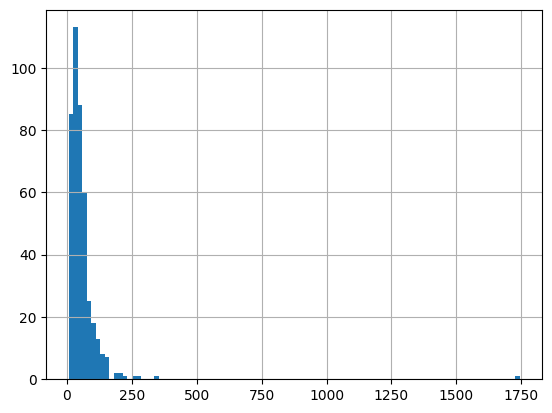

In [1469]:
combined['mql_count'].hist(bins=100)

In [1470]:
combined['mql_count'].quantile(0.95)

np.float64(131.75)

In [1471]:
# Filter for GA3 data
combined = combined[combined['date']<pd.Timestamp('2025-05-01').date()]
combined['averageMQL'] = (combined['mql_count'].shift(1) + combined['mql_count'].shift(-1)) / 2
combined['smoothed_MQL'] = np.where(combined['mql_count']>130,combined['averageMQL'] , combined['mql_count'])

In [1472]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries,inflation_rate,date_y,durable_goods_rates,averageMQL,smoothed_MQL
187,202442,2024-10-15,42,2024,238767.0,95.0,12605.50999,178616,1038,1284.0,...,0.0,340,3896.0,10,18677.0,0.026,2024-10-31,0.0079,79.0,79.0


In [1484]:
combined['daily_avg_queries'] = combined['daily_avg_queries'].fillna(combined['daily_avg_queries'].mean())
combined['durable_goods_rates'] = combined['durable_goods_rates'].fillna(combined['durable_goods_rates'].mean())
combined['inflation_rate'] = combined['inflation_rate'].fillna(combined['inflation_rate'].mean())

In [1485]:
train_small = combined[combined['date']<=pd.Timestamp('2024-10-11').date()]
test_small = combined[(combined['date']>pd.Timestamp('2024-10-11').date()) & (combined['date']<pd.Timestamp('2024-12-11').date())]

In [1486]:
train_small[train_small['durable_goods_rates'].isna()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries,inflation_rate,date_y,durable_goods_rates,averageMQL,smoothed_MQL


In [1487]:
train_small.to_csv('mmm_train_small.csv')
test_small.to_csv('mmm_test_small.csv')

In [1488]:
train_small.shape

(184, 29)

In [1489]:
len(['ga4_sessions',
 'podcast_streams',
 'linkedin_spend',
 'linkedin_impressions',
 'linkedin_clicks',
 'gSearch_sessions',
 'gSearch_impressions',
 'gift_spend',
 'email_opened_cnt',
 'direct_spend',
 'fb_spend',
 'fb_impressions',
 'fb_clicks',
 'googleAds_spend',
 'googleAds_impressions',
 'daily_avg_queries'])

16

In [1500]:
train_all = combined[combined['date']<=pd.Timestamp('2025-03-11').date()]
test_all = combined[combined['date']>pd.Timestamp('2025-03-11').date()]

In [1501]:
train_all.shape

(335, 29)

In [1502]:
test_all[test_all['daily_avg_queries'].isnull()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries,inflation_rate,date_y,durable_goods_rates,averageMQL,smoothed_MQL


In [1503]:
caseDF = train_all[train_all['durable_goods_rates'].isna()==True]
caseDF['iso_year']

Series([], Name: iso_year, dtype: int64)

In [1504]:
import pandas as pd

# Assuming your DataFrame has a date column called 'date'
df = train_all.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Find gaps larger than 1 day
df['date_diff'] = df['date'].diff().dt.days
non_sequential = df[df['date_diff'] > 1]
print(non_sequential)


Empty DataFrame
Columns: [model_week, date, iso_week, iso_year, ga4_sessions, podcast_streams, linkedin_spend, linkedin_impressions, linkedin_clicks, gSearch_sessions, gSearch_impressions, gift_spend, email_opened_cnt, direct_spend, fb_spend, fb_impressions, fb_clicks, googleAds_spend, googleAds_impressions, event_spend, mql_count, impactDotCom_ga4_sessions, month, daily_avg_queries, inflation_rate, date_y, durable_goods_rates, averageMQL, smoothed_MQL, date_diff]
Index: []

[0 rows x 30 columns]


In [1505]:
train_all.to_csv('mmm_train_all.csv')
test_all.to_csv('mmm_test_all.csv')

In [1506]:
train_all.shape

(335, 29)